# Introdução


Sempre é necessário validar a estabilidade do seu modelo de aprendizado de máquina. Quero dizer, você simplesmente não pode ajustar o modelo aos seus dados de treinamento e espero que funcione com precisão para os dados reais nunca vistos antes. Você precisa de algum tipo de garantia de que seu modelo obteve a maioria dos padrões dos dados corretos. Para isso, usamos um conjunto de "teste" para medir a performance e identificar overfitting. Mas será que selecionar aleatoriamente uma amostra para teste é a melhor opção para validar nosso modelo?


# Método Holdout 

Até agora, para validar nosso modelo, temos utilizado um método conhecido como holdout. Nele, realizamos a amostragem dos conjuntos de treino e teste, sem reposição. Dessa forma, utilizamos os dados de treino para aprender os parâmetros (betas) dos modelos e após o treinamento, utilizamos o conjunto de teste para medir a performance do nosso modelo em um conjunto de dados nunca visto, simulando um cenário real.

Por que não podemos medir a performance somente nos dados de treino??


A resposta é simples: Quando medimos a performance da amostra de treino, estamos sendo otimistas em relação ao erro e não temos a garantia de que o modelo realmente aprendeu. Não temos como saber se o modelo simplesmente decorou os dados ou não. Quando fazemos isso, introduzimos algo chamado de viés otimista. Esse vies otimista pode ser calculado como a diferença entre a performance do treino e teste.

Beleza. Mas nesse processo de amostragem podemos encontrar 2 problemas, conseguem enxergar quais???


Devemos ter em mente que nosso conjunto de dados representa uma amostra aleatória retirada de uma distribuição de probabilidade; e normalmente assumimos que esta amostra é representativa da população real. Contudo, numa amostragem sem substituição, vamos alterando as estatísticas (média, proporção e variância) da amostra. Devemos notar que a amostragem sem substituição afeta as estatística de maneira inversamente proporcional ao tamanho da amostra!. Esse é o primeiro ponto! Para esse problema, nós já encontramos uma solução em aulas passadas: Seleção estratificada. O segundo vem do fato de que nosso modelo aprende com dados!, Estamos separando uma amostra dos dados para estimar a performance, mas talvez o algoritmo nem tenha atingido sua completa capacidade!. Ou seja, na prática, a estimação da performance é viesada pessimisticamente. 

<img src="https://sebastianraschka.com/images/blog/2016/model-evaluation-selection-part2/model-eval-mnist_0.png" width=400>

# Holdout  Repetitivo

Sempre que estamos criando um modelo de machine learning dividimos nosso conjunto de dados em treino e teste, utilizando uma ```random_state``` qualquer. Mas será que nossos resultados seriam diferentes se alterássemos esse parâmetro?? A resposta é depende! Já que estamos lidando com aleatoriedade, pode acontecer de nossa amostra de teste não ser representativa o suficiente e nosso modelo performar muito pior. Para contornar esse problema, que tal repetir várias vezes o processo de amostragem, alterando a ```random_state``` para obter uma média de erros em diferentes conjuntos de teste?? Parece uma boa! 

O único empecilho dessa abordagem é que estaríamos sujeitos a criar alguns modelos que compartilharam o mesmo dado de treinamento. Para contornar esse problema, temos um outro processo chamado de validação cruzada que veremos a seguir.

<img src="https://miro.medium.com/max/872/1*-wSS_-Yy2xySeNikFXbj1g.png" width=300>

# Validação Cruzada K-Fold

<div style="text-align: center">
<img src="img/kfold.png" align="center" width="60%">

Quando temos muito poucos dados, dividi-los em conjunto de treinamento e teste pode nos deixar com um conjunto de testes muito pequeno. Digamos que temos apenas 100 observações. Se fizermos uma divisão simples de 80 a 20, obteremos 20 observações em nosso conjunto de testes. Não é suficiente. Podemos obter quase qualquer desempenho neste conjunto apenas devido ao acaso. O problema é ainda pior quando temos um projeto com várias classes. Se tivermos 10 classes e apenas 20 observações, nos resta apenas 2 observações para cada classe, em média. Testar qualquer coisa em apenas duas observações não pode levar a uma conclusão real.


Se usarmos a validação cruzada nesse caso, construiremos K modelos diferentes, para que possamos fazer previsões em todos os nossos dados. Para cada instância, fazemos uma previsão por um modelo que não viu essa observação e, portanto, estamos recebendo 100 observações em nosso conjunto de testes. Para o problema de várias classes, obtemos 10 observações para cada classe, em média, e é muito melhor do que apenas 2. Depois de avaliarmos nosso algoritmo de aprendizado, agora podemos treinar nosso modelo em todos os nossos dados, porque se nossos 5 modelos tiveram desempenho semelhante usando conjuntos de treino diferentes, assumimos que, treinando-os em todos os dados, obteremos um desempenho semelhante.


Ao fazer a validação cruzada, podemos usar todas as nossas 100 observações, tanto para treinamento quanto para teste, enquanto avaliamos nosso algoritmo de aprendizado em dados nunca antes vistos.
 
____________

# K-Fold Estratificado

Utilizando um train-test split de nossos dados, assumimos que nossos exemplos são independentes. Isso significa que, conhecer / ver alguma instância não nos ajudará a entender outras instâncias. No entanto, esse nem sempre é o caso.

**Stratified Cross-Validation**:Quando dividimos os dados em *folds*, queremos garantir que cada parte seja um bom representante de todos os dados. O exemplo mais básico é que queremos a mesma proporção de classes diferentes em cada parte. Na maioria das vezes, isso acontece apenas aleatoriamente, mas às vezes, em conjuntos de dados complexos, precisamos aplicar uma distribuição correta para cada parte.

<div style="text-align: center">
<img src="https://qiita-image-store.s3.amazonaws.com/0/316551/661113d1-ab0a-6ec9-9215-c635f5d8c606.png" align="center" width=700>
    


# Leave One Out Validation

<div style="text-align: center">
<img src="https://assets.datacamp.com/production/repositories/3981/datasets/8a6236f142b1ee2e4a70aae2af9507c7c580f302/Screen%20Shot%202019-01-27%20at%209.25.41%20AM.png" align="center" width=500>

Validação cruzada Leave-One-Out (LOOCV) é muito parecido com validação cruzada holdout. Ambos separam os dados em duas partes, mas o LOOCV utiliza somente uma observação na fase de validação. I.e., treina-se o modelo com n−1 dados, {(x1,y1),…,(xk−1,yk−1),(xk+1,yk+1),…,(xn,yn)} e o avalia utilizando a observação restante, (xk,yk). Repetimos esse procedimento n vezes, excluindo em cada momento uma observação diferente.

A validação cruzada via LOOCV apresenta vantagens sobre holdout, pois possui menor vício (não superestima o erro do teste), além de não ser tão influenciada pela aleatorização das partições.
    
OBS: Alto custo computacional. Deve ser usada apenas em pequenos datasets.

# A escolha de hiperparâmetros

Até agora não falamos de hiperparâmetros, temos apenas utilizado os valores default das bibliotecas! Afinal, como escolher os melhores hiperparâmetros pro nosso modelo? Podemos usar o erro da validação cruzada para escolher nossos hiperparâmetros e estimar o erro do modelo ao mesmo tempo?

Podemos traçar a seguinte estratégia:
- Escolher uma lista de valores de hiperparâmetros (vários valores C do svm, por exemplo)
- Medir o erro de validação cruzada para todos os valores de C listados
- Escolher o valor de C que possui o menor erro

Essa estratégia parece boa, mas na verdade, quando fazemos isso estamos perdendo a capacidade de estimar nossa performance. Isso ocorre, pois estamos selecionando os hiperparâmetros para os quais o erro já seria o menor possível.

## Treino, Teste e Validação

Uma alternativa pra esse problema é dividirmos os nossos dados em 3 datasets distintos. O dataset de treino será usado para o algoritmo aprender os betas, o dataset de validação será usado para ajustar a arquitetura e o dataset de teste para estimar a performance esperada.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/ML_dataset_training_validation_test_sets.png/1200px-ML_dataset_training_validation_test_sets.png" width=500>

Novamente, voltamos ao impasse de que estamos retirando ainda mais dados do conjunto de treino, tendo assim uma estimativa pessimista. Além disso, como já foi falado, estamos suceptíveis a aleatoriedade. Em alguns casos, em que temos datasets pequenos, podemos obter métricas boas por puro acaso. Em datasets maiores, sofremos menos com isso e essa pode ser uma prática boa e de mais baixo custo computacional;

<img src="https://miro.medium.com/max/1484/1*OJVhBtg5YgeW7rKXoxKQxg.png" width=600>

## Validação K-Fold

<img src="https://sebastianraschka.com/images/blog/2016/model-evaluation-selection-part3/kfold.png" width=500>

A ideia aqui é separar um conjunto de treino e teste, como no método holdout. O conjunto de teste vai ser usado para estimar a performance do modelo final. O conjunto de treino, por sua vez, será usado dentro de um processo de validação cruzada K-Fold. 
Na validação cruzada K-Fold, a cada iteração um modelo será ajustado, com um conjunto de hiperparâmetro fixo, e a métrica de interesse será medida. No final das k iterações, extraímos a média do conjunto de K-Folds e repetimos o proximo, agora utilizando um outro conjunto fixo de hiperparâmetros.
Note que podemos criar vários conjuntos diferentes para testar nos nossos modelos. No final de todo o processo, o conjunto de parâmetros campeão é aquele cujo erro de validaçao cruzada seja o menor possível. No fim, reunimos todo o conjunto de treino, ajustamos nosso modelo e então estimamos a performance no conjunto de teste que foi separado inicialemnte.

-  Split em Treino e Teste
- Criação de lista de hiperparâmetros
- KFold para cada item da lista
- Medição do erro em cada KFold (conjunto de hiperparâmetro)
- Seleção do melhor conjunto, baseado no menor erro
- Treinamento do modelo com todo o conjunto de treino
- Estimativa da performance final no conjunto de teste

# Exemplo com Dados Sintéticos

Vamos estudar um exemplo do uso de validação cruzada para calcular as curvas de validação de uma classe de modelos. Aqui, vamos usar um modelo de *regressão polinomial*: é um modelo linear generalizado, em que o grau dos polinômios é um parâmetro configurável. 

Por exemplo, um polinômio de grau 1 ajusta uma linha reta aos dados; para os parâmetros do modelo $a$ e $b$:

$$
y = ax + b
$$

Um polinômio de grau 3 ajusta uma curva cúbica aos dados; para parâmetros $a, b, c, d$: 

$$
y = ax^3 + bx^2 + cx + d
$$

Isso pode ser generalizado a qualquer número de recursos polinomiais.

No Scikit-Learn, é possível implementar esse modelo com uma simples regressão linear combinada com o pré-processador polinomial (polynomial preprocessor).

Usar o __[sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)__ para organizar essas operações sequencialmente. 

## Importando as bibliotecas

In [11]:
# importando as bibliotecas
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


## Definindo uma função para aplicação de regressão linear

Esta função permite a aplicação de função exponencial polinomial para as features dos dados

In [12]:
# definindo uma função para o pipeline para uma regressão polinimial
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

## Criando os dados

Agora vamos criar alguns dados sintéticos (artificiais, inventados), 
aos quais o nosso modelo será ajustado em seguida.

In [13]:
# iportando as bibliotecas
import numpy as np

# definindo uma função para gerar dados
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)



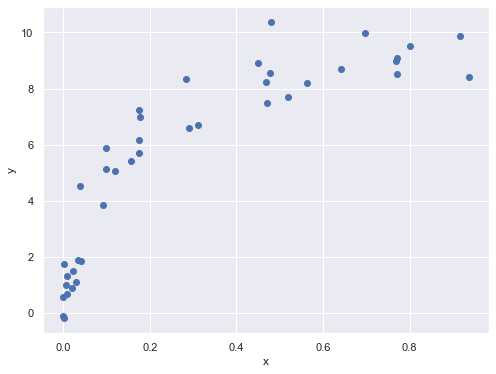

In [14]:
# visualizando os dados gerados
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
X.shape,y.shape

((40, 1), (40,))

Agora podemos visualizar nossos dados, junto com os ajustes polinomiais de vários graus.

** OBERVAÇÃO: ** Este código é auxiliar e não é necessário entender todos os detalhes para seguir o exemplo.

## Verificação da aderência aos dados

Podemos identificar qual é o grau da função polinomial que mais se adapta à configuração dos dados

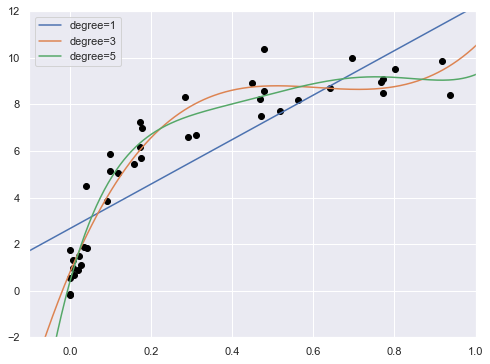

In [16]:
# importando as bibliotecas
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting
plt.figure(figsize=(8,6))

# definindo um vetor bidimensional para novos dados de entrada com 500 pontos
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

# plotando uma dispersão com os dados gerados originalmente
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()

# criando predições de funções com graus 1,3 e 5 com PolynomialRegression
# plotando os gráficos destas funções 
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

Nesse caso, "o botão" que controla a complexidade do modelo é o grau do polinômio, que pode ser qualquer inteiro não negativo.

Uma interessante pergunta a ser feita: qual grau de polinômio fornece um compromisso apropriado entre viés (subajuste) e variância (superajuste)?

Podemos prosseguir visualizando a curva de validação para este conjunto de dados e modelo específicos; isso pode ser feito facilmente usando a função ``validation_curve`` fornecida por Scikit-Learn.

Dado um modelo, um conjunto de dados, um nome de parâmetro e um intervalo a ser explorado, essa função calculará automaticamente tanto o score de treinamento como o score de validação ao longo do intervalo.

## Parâmetro que mais adere aos dados (grau da polinomial) por Cross-Validation

Utilização da Curva de Validação para procurar o grau para a melhor polinomial que se ajusta aos dados utilizando o pacote __[sklearn.model_selection.validation_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html)__

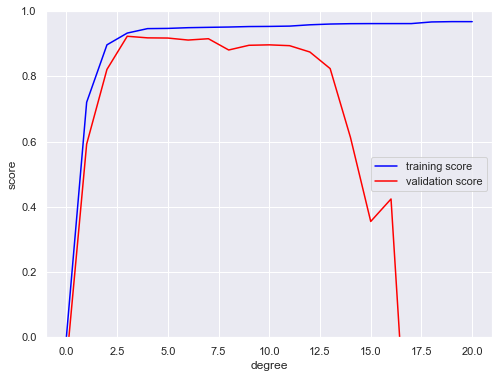

In [17]:
# importando as bibliotecas
from sklearn.model_selection import validation_curve
plt.figure(figsize=(8,6))

# obendo os scores de validação para treino e teste
# utilizando a classe validation curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(estimator=PolynomialRegression(), 
                                          X=X, 
                                          y=y, 
                                          param_name='polynomialfeatures__degree', 
                                          param_range=degree, 
                                          cv=7) # Cross-Validation hyper-param

# plotando as curvas de teste e validação
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

Este gráfico mostra precisamente o comportamento qualitativo que esperamos: o score de treinamento sempre é maior que o score de validação; o score de treinamento cresce lentamente junto com a complexidade do modelo; e o score de validação atinge um máximo antes de finalmente começar a cair à medida que o modelo é superajustado. 

A partir da curva de validação, é possível interpretar que o compromisso ideal entre viés e variância é encontrado com um polinômio de terceira ordem; podemos calcular e mostrar esse ajuste sobre os dados originais.


In [8]:
# Check the list of available parameters with `estimator.get_params().keys()`.
for param in PolynomialRegression().get_params().keys():
    print(param)

memory
steps
verbose
polynomialfeatures
linearregression
polynomialfeatures__degree
polynomialfeatures__include_bias
polynomialfeatures__interaction_only
polynomialfeatures__order
linearregression__copy_X
linearregression__fit_intercept
linearregression__n_jobs
linearregression__normalize


## Plotando o gráfico de melhor ajuste da curva 

Utilização da polinomial de grau 3 para plotar a curva de malor ajuste aos pontos

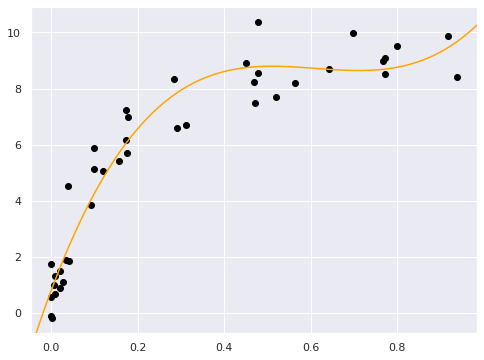

In [9]:
# plotando o gráfico de melhor ajuste
plt.figure(figsize=(8,6))
plt.scatter(X.ravel(), y, color='black')
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test,color='orange');
plt.axis(lim);

Notar que encontrar esse modelo ideal não exigiu que fosse calculado apenas o score de treinamento, mas examinando o relacionamento entre os scores de treinamento e validação, conseguimos obter um insight válido sobre o desempenho do modelo.

____________